In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

Our traning data is binance 15min candlestick for 10 days (1000 candle)

In [2]:
candlestick_df = pd.read_csv('ETHUSDT_15m.csv')

In [3]:
candlestick_df

,open,high,low,close,volume,openTime,closeTime
0,1330.81,1334.00,1327.01,1331.61,25708.002,2021-02-01 12:45:00,2021-02-01 12:59:59
1,1331.62,1335.74,1329.14,1334.71,15035.002,2021-02-01 13:00:00,2021-02-01 13:14:59
2,1334.85,1334.91,1328.80,1330.48,10927.057,2021-02-01 13:15:00,2021-02-01 13:29:59
3,1330.48,1334.01,1326.06,1333.53,16816.563,2021-02-01 13:30:00,2021-02-01 13:44:59
4,1333.53,1339.14,1327.92,1328.28,22005.926,2021-02-01 13:45:00,2021-02-01 13:59:59
...,...,...,...,...,...,...,...
995,1768.56,1770.28,1760.79,1763.61,21180.039,2021-02-11 21:30:00,2021-02-11 21:44:59
996,1763.51,1771.14,1763.01,1769.82,14893.496,2021-02-11 21:45:00,2021-02-11 21:59:59
997,1769.87,1778.28,1767.13,1775.70,14938.031,2021-02-11 22:00:00,2021-02-11 22:14:59
998,1775.70,1780.00,1772.78,1774.89,9641.882,2021-02-11 22:15:00,2021-02-11 22:29:59


In [4]:
candlestick_df = candlestick_df.drop(['openTime','closeTime','volume'], axis=1)

Prepare input(X) and target output(Y)

In [5]:
X = candlestick_df.drop(['close'], axis=1)
y = candlestick_df['close']

Split data for test and train (20-80)

In [6]:
N_data = len(X)
N_train = int(0.8*N_data)
N_test = N_data - N_train

In [7]:
X_train = X.iloc[0:N_train,:]
X_test = X.iloc[N_train+1:N_data-1,:]
y_train = y.iloc[0:N_train]
y_test = y.iloc[N_train+1:N_data-1]

3 hidden layer with 164 and 82 and 8 nodes (based on a paper on medium for predicting stock market but i use it on binance perpetual swap ETH-USDT) and max iteration is 1000. 

In [32]:
mlp = MLPRegressor(hidden_layer_sizes=(164,82,8), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

The MSE is a measure of the quality of an estimator it is always non-negative, and values closer to zero are better.

In [33]:
print(f'R^2 = {mlp.score(X_test, y_test)}')
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f'Root mean square error = {rmse_mlp}')

R^2 = 0.9551151194265152
Root mean square error = 6.998986408894664


In [34]:
y_test_pred_mlp = pd.DataFrame({'y_test':y_test,'y_pred_mlp':y_pred_mlp}, index=X_test.index )

Text(0.5, 1.0, 'MLP ETHUSDT binance future prediction')

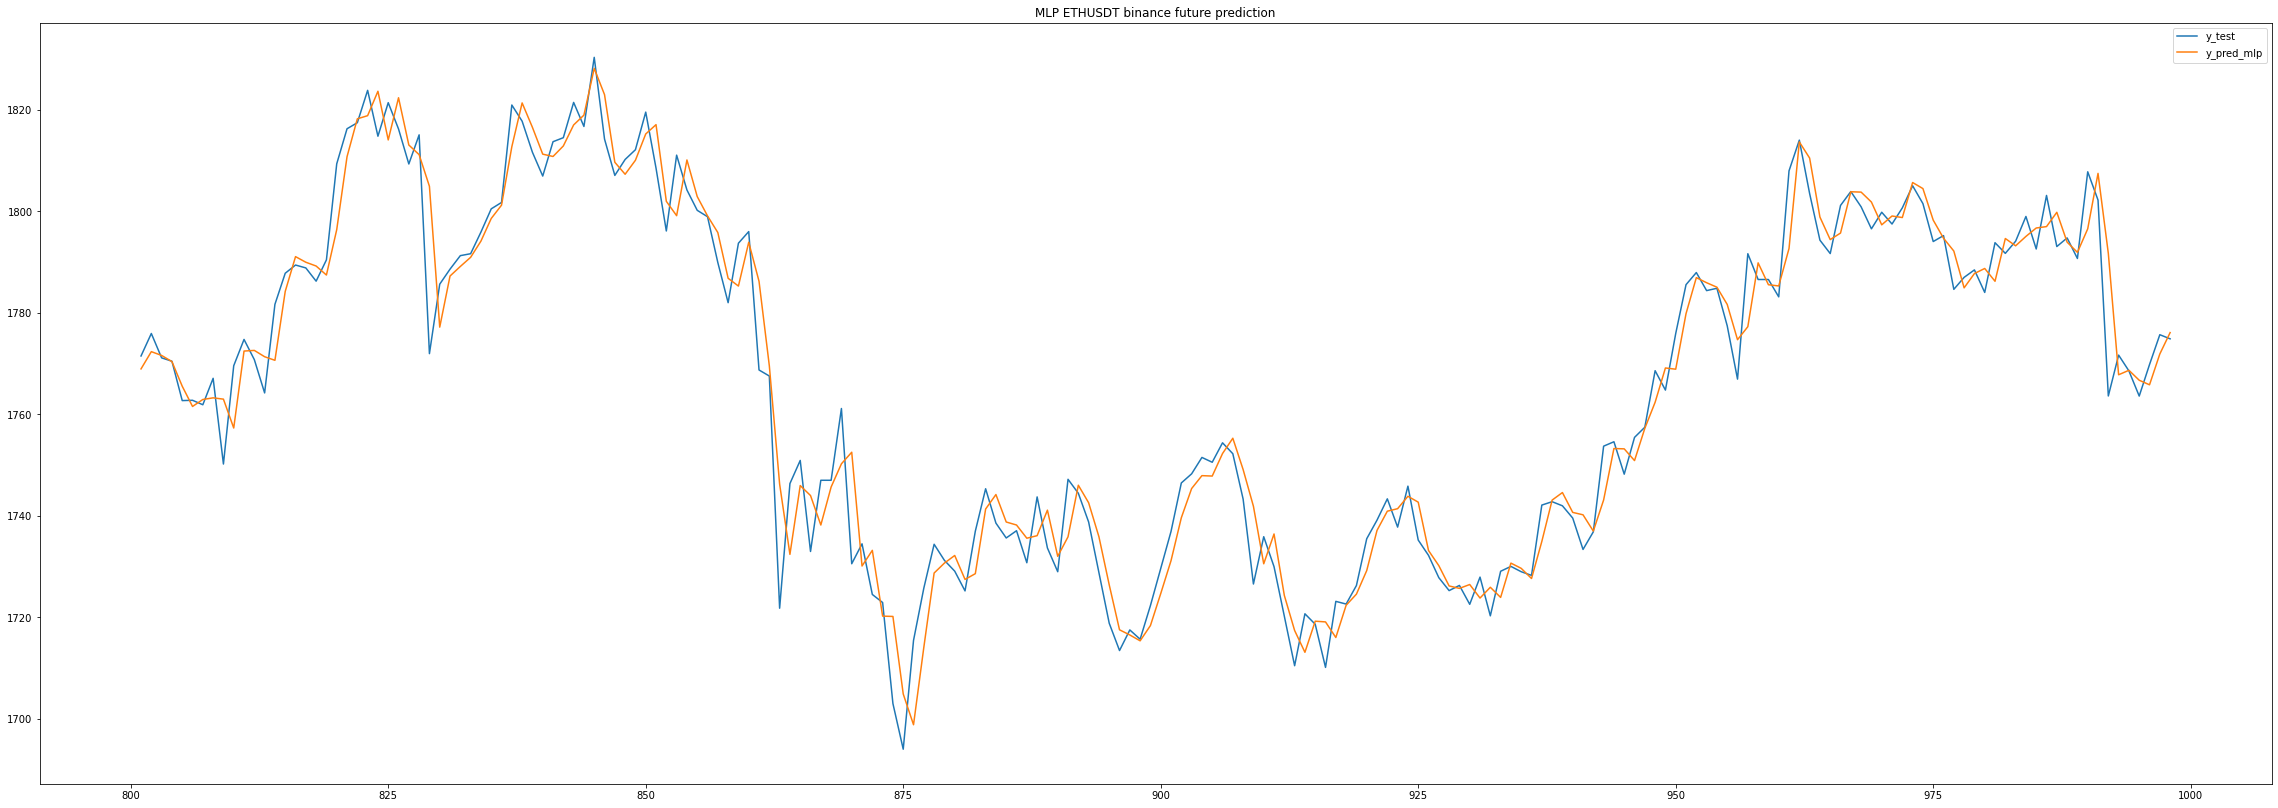

In [35]:
y_test_pred_mlp.plot(legend=True,figsize=(40,14))
plt.title('MLP ETHUSDT binance future prediction')